# Q:
# 1.線形回帰とは何か。
# 2.具体的に言うと？
# 3.分類と何が違うのか。

# A:
### 1.線形回帰とは、あるデータから別の値を予測するという回帰分析の一種である。
### 2.あるデータを説明変数(x)、予測する別の値を目的変数(y)とおいたとき、xのデータを散布図に示せば一直線上にキレイに並ぶことは実際にはなく、バラつきのある形になる。したがってバラついたxからyを予測すれば、当然ズレが発生する。このズレを最小限にした予測を実現するために、バラつきの中に当てはまりの良い直線（予測式y=ax+b）をひくことを線形回帰という。
### 3.　回帰分析：予測するのは"実数値"。分類：予測するのは"カテゴリ"。

# ライブラリのインポート

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
boston=load_boston()

# データを取得する

In [2]:
X=pd.DataFrame(boston.data[:,:],columns=boston.feature_names)
y=pd.DataFrame(boston.target)

# 説明変数を'LSTAT'のみにする

In [3]:
X=X.drop(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B'],axis=1)

# Q:
# 単回帰と重回帰についての違いを記述せよ

# A:
#### 単回帰：一つの説明変数による回帰分析
#### 重回帰：複数の説明変数による回帰分析

# テストデータに分割する

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


# 機械学習

In [6]:
lin_1d=LinearRegression()
lin_1d.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# 決定係数

In [7]:
score_1d=lin_1d.score(X_test,y_test)
print(score_1d)

0.430956728462


# Q:
# 1.決定係数とは何か。
# 2.もっとも説明変数が、目的変数を説明できる場合、決定係数は何になるか
# 3.どのように求めることができるか

# A:
## 1.予測式の当てはまりの良さ＝汎化能力を数値で評価した値。
## 2.最大値の１となる。
## 3.決定係数R**2 ＝１ー（予測値と実際の値（教師情報）との差（最小二乗誤差）／　その分散）

# Q:
# 1.決定係数が高ければ、汎用性があるモデルと言えるか？
# 2.決定係数が正しく評価できない例を答えよ。

# A:
### 1.言えない。
### 理由：予測したい対象（母集団）に対して少ないサンプル数（教師情報）や説明変数で学習したモデルである場合、その決定係数がいくら高くても予測精度が悪くなるため。
#### （サンプル数や説明変数が少なすぎると、自由度（自由に変えることができるデータの個数）が小さくなる。すると「信頼区間（母平均が含まれると推定される区間）」も拡がってしまう。それでは標本誤差の影響が大きくなってしまう。結果的に予測精度も悪いことになり、汎用性があるモデルとは言えなくなる。）
### 2.日本国民全体からランダムに1000人選んでアンケートを行い、アンケート結果を線形回帰による機械学習を行い、決定係数を高めたが、その予測結果を母集団である日本国民全体に当てはめる例。

# ２、３、４次式の回帰

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
lin_2d=LinearRegression()
lin_3d=LinearRegression()
lin_4d=LinearRegression()

degree_2=PolynomialFeatures(degree=2)
degree_3=PolynomialFeatures(degree=3)
degree_4=PolynomialFeatures(degree=4)

X_train_2=degree_2.fit_transform(X_train)
X_train_3=degree_3.fit_transform(X_train)
X_train_4=degree_4.fit_transform(X_train)

lin_2d.fit(X_train_2,y_train)
lin_3d.fit(X_train_3,y_train)
lin_4d.fit(X_train_4,y_train)

X_test_2=degree_2.fit_transform(X_test)
X_test_3=degree_3.fit_transform(X_test)
X_test_4=degree_4.fit_transform(X_test)

score_2d=lin_2d.score(X_test_2,y_test)
score_3d=lin_3d.score(X_test_3,y_test)
score_4d=lin_4d.score(X_test_4,y_test)

print(score_2d)
print(score_3d)
print(score_4d)

0.522932416374
0.542859439561
0.573799166506


# Q:
# 1.説明変数をxとして、次数を増やしていくとどのように数式が変化していくか記述せよ（1次式 ax + b)
# 2.次数を増やすとどのようなメリットが考えられるか
# 3.次数を増やすとどのようなデメリットが考えられるか

# A:
### 1. 
### a(x**2)+b(x)+c , 
### a(x**3)+b(x**2)+c(x)+d , 
### a(x**4)+b(x**3)+c(x**2)+d(x)+e

## 2. より複雑なモデルになり表現力が向上する。すなわち、より当てはまりの良い線形回帰ができるようになる。

## 3. モデルの表現力が高すぎると、トレインデータのノイズまでしっかりと学習してしまうため過学習が発生してしまう。

# 重回帰分析

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
x_df=pd.DataFrame(boston.data[:,:],columns=boston.feature_names)
y=pd.DataFrame(boston.target)

# 説明変数、目的変数の相関係数一覧

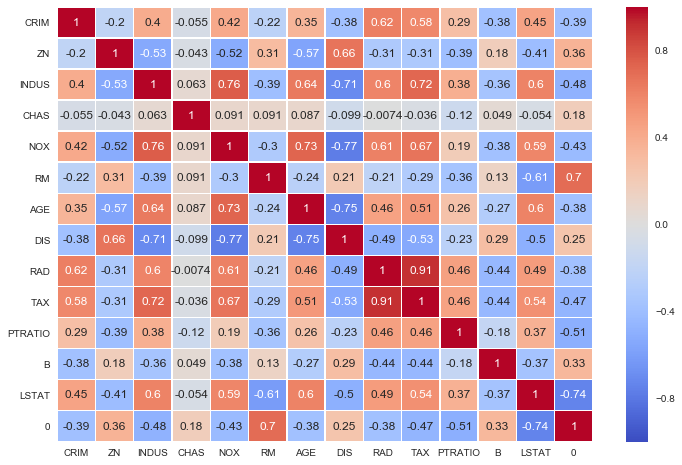

In [12]:
x_y=pd.concat([x_df,y],axis=1)
x_y.corr('pearson')
x_y.corr('spearman')

plt.figure(figsize=(12,8))
sns.heatmap(x_y.corr(),annot=True,cmap='coolwarm',linewidths=.5)

# 説明変数の選択

In [13]:
x_asmatrix=x_df.loc[:,['LSTAT','TAX','RM']].as_matrix()
y=y.as_matrix()

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x_asmatrix,y,test_size=0.2,random_state=0)

# ２、３、４次式で重回帰→３次式の決定係数が最も高くなった

In [15]:
y_storage=[]
dim=[2,3,4]

for i in dim:
    lin_=LinearRegression()
    degree_=PolynomialFeatures(degree=i)
    x_train_=degree_.fit_transform(x_train)
    lin_.fit(x_train_,y_train)
    
    x_test_=degree_.fit_transform(x_test)
    score_=lin_.score(x_test_,y_test)
    y_storage.append(score_)
    
print(y_storage)

[0.68971054885098537, 0.71212466072011826, 0.70239205271828287]


# Q:
# 重回帰分析について説明せよ。

# A:
# 複数の説明変数を用いて回帰分析すること。
## 主に２つの分析目的を考えることができる。
## （１）複数の説明変数のうち、どの説明変数が目的変数に対して影響が大きいかを分析すること。
## →標準化回帰係数による比較や、説明変数の有意性の検定。
####   ただし以下の点を踏まえ、分析結果の解釈に注意が必要。
####   ＊計算項目にある偏回帰係数とは、「他の説明変数の影響を除いたうえでの当該変数の影響部分」である。しかしいっぽうで、説明変数同士は互いに相関を持つ。
####   ＊有意水準よりも小さいと判定された説明変数が、目的変数との相関係数も小さいとは限らない。

## （２）複数の説明変数を駆使して、目的変数を説明するモデルを構築すること。

# Q:
## 1.説明変数を増やすことでどのようなメリットがあるか
## 2.説明変数を増やすことでどのようなデメリットがあるか

# A:
## 1.モデルの表現力が向上し、目的変数をよく説明できるようになる。

## 2.多重共線性問題が発生する可能性がある。
## 対策：説明変数同士の相関係数に注意する。VIF(variance inflation factor)という値を計算し、多重共線性問題が発生しているか検証する。最終的には、分析の目的に沿って採用する説明変数を分析者が取捨選択する。